<a href="https://colab.research.google.com/github/techut30/Machine-learning-assignment-1/blob/main/Stochastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convergence reached after 71 iterations.


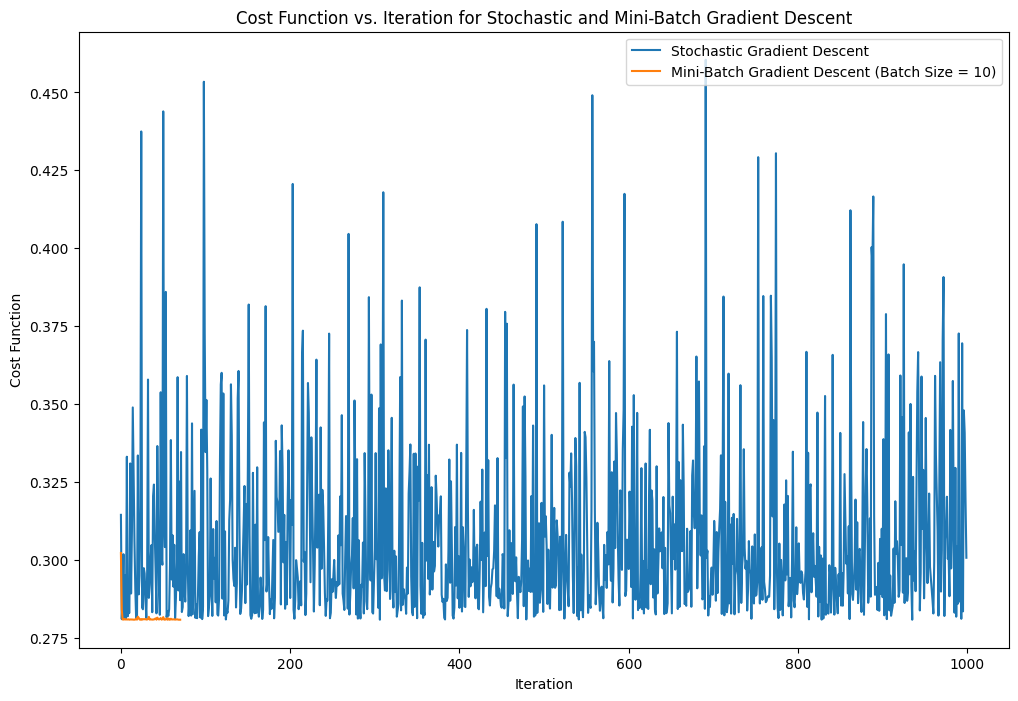

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

independent_data = pd.read_csv("linearX.csv")
dependent_data = pd.read_csv("linearY.csv")
X = independent_data.values.ravel()
y = dependent_data.values.ravel()
X_mean = np.mean(X)
X_std = np.std(X)
X_normalized = (X - X_mean) / X_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

def hypothesis(X, theta0, theta1):
    return theta0 + theta1 * X

def cost_function(X, y, theta0, theta1):
    m = len(X)
    predictions = hypothesis(X, theta0, theta1)
    squared_errors = (predictions - y) ** 2
    J = (1/(2*m)) * np.sum(squared_errors)
    return J

def stochastic_gradient_descent(X, y, learning_rate, iterations, convergence_threshold):
    theta0 = 0
    theta1 = 0
    m = len(X)
    cost_history = []

    previous_cost = cost_function(X, y, theta0, theta1)
    for i in range(iterations):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for j in range(m):
            x_j = X_shuffled[j]
            y_j = y_shuffled[j]

            prediction = hypothesis(x_j, theta0, theta1)
            error = prediction - y_j

            dtheta0 = error
            dtheta1 = error * x_j
            theta0 -= learning_rate * dtheta0
            theta1 -= learning_rate * dtheta1

        current_cost = cost_function(X, y, theta0, theta1)
        cost_history.append(current_cost)

        if abs(current_cost - previous_cost) < convergence_threshold:
            print("Convergence reached after", i+1, "iterations.")
            break

        previous_cost = current_cost

    return theta0, theta1, cost_history

def mini_batch_gradient_descent(X, y, learning_rate, batch_size, iterations, convergence_threshold):
    theta0 = 0
    theta1 = 0
    m = len(X)
    cost_history = []

    previous_cost = cost_function(X, y, theta0, theta1)
    for i in range(iterations):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]
        num_batches = m // batch_size
        X_batches = np.array_split(X_shuffled, num_batches)
        y_batches = np.array_split(y_shuffled, num_batches)

        for X_batch, y_batch in zip(X_batches, y_batches):
            predictions = hypothesis(X_batch, theta0, theta1)
            errors = predictions - y_batch

            dtheta0 = (1/batch_size) * np.sum(errors)
            dtheta1 = (1/batch_size) * np.sum(errors * X_batch)
            theta0 -= learning_rate * dtheta0
            theta1 -= learning_rate * dtheta1
        current_cost = cost_function(X, y, theta0, theta1)
        cost_history.append(current_cost)
        if abs(current_cost - previous_cost) < convergence_threshold:
            print("Convergence reached after", i+1, "iterations.")
            break

        previous_cost = current_cost

    return theta0, theta1, cost_history
learning_rate = 0.1
iterations = 1000
convergence_threshold = 1e-6

theta0_stochastic, theta1_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_normalized, y_normalized, learning_rate, iterations, convergence_threshold)


batch_size = 10
theta0_mini_batch, theta1_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_normalized, y_normalized, learning_rate, batch_size, iterations, convergence_threshold)
plt.figure(figsize=(12, 8))
plt.plot(range(len(cost_history_stochastic)), cost_history_stochastic, label='Stochastic Gradient Descent')
plt.plot(range(len(cost_history_mini_batch)), cost_history_mini_batch, label='Mini-Batch Gradient Descent (Batch Size = 10)')
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration for Stochastic and Mini-Batch Gradient Descent')
plt.legend()
